In [ ]:
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr,spearmanr,kendalltau
import pandas as pd
import numpy as np

from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

# 股票估值

参考链接：
https://wenku.baidu.com/view/9baa6c79ac51f01dc281e53a580216fc710a533d.html?fr=income1-wk_app_search_ctr-search


## 比率估值法

* 比率估值法的基本理论

现金流贴现估值法等内在价值法在计算上非常繁琐，而且不确定性因素很多，尤其是难以在不同的公司之间进行比较.而比率估值法通过寻找确定可比较资产，根据某个共同的变量，如收入、现金流量、账面价值或者销售收入,借助可比较资产的价值来估计标的资产的价值.在比率估值法中，资产的价值通过参考“可比”资产的价值与某一变量，如收益、现金流、账面价值或收入等比率而得到。比率估值法的优点在于简单且易于使用,应用该方法可以迅速获得被估价资产的价值。当金融市场上有大量可比资产进行交易，并且市场在平均水平上对这些资产的定价是正确的时候，应用比率估值法就比较适当。

* 市盈率(PE)估值法

市盈率(PE)是一个反映股票收益与风险的重要指标，也叫市价盈利率。它是用当前每股市场价格除以该公司的每股税后利润,其计算公式如下:
市盈率=股票市价/每股税后利润
市场广泛谈及的市盈率通常指的是静态市盈率，即以目前市场价格除以已知的最近公开的每股收益后的比值。但是静态市盈率只静态地考虑了当前的公司每股收益，没有动态地考虑公司的成长性，动态市盈率也就由此而生。动态市盈率计算公式如下：
动态市盈率=静态市盈率×动态系数；动态系数=1/[(1+i）n]；其中i=企业每股收益的增长性比率，n=企业的可持续发展的存续期.

* 市净率（PB）估值法

市净率估值法的基本理论与市盈率(PE）估值法的基本理论相似，只是选用的财务比率不同，市净率指的是市价与每股净资产之间的比值，比值越低意味着风险越低。其计算公式如下 :市净率=股票市价/每股净资产。
净资产的多少是由公司经营状况决定的，经营业绩越好，其资产增值越快,股票净值就越高，因此股东所拥有的权益也越多。

* 比率估值法的适用性

净资产、收益等数据容易获得且计算简单，并且对于那些不会使用现金流贴现估值方法的投资者而言，提供了一个非常简单的比较标准。投资者可以通过比较同行业中不同公司的市盈率、市净率来发现价值被高估或低估的企业。
但在认识比率估值法时，至少要注意以下问题。第一,但是如果公司收益或获净资产是负值，比率估值法就失去了估值的意义;第二，如果市场高估或低估了某行业所有公司的价值，则运用这些公司的平均市盈率对某家该行业的公司进行估值，就会导致其股票价值的高估或低估。


### classwork 1.2

* 获取酒类板块与汽车板块各个股票的市盈率与市净率，并比较贵州茅台与比亚迪汽车

* 计算这两个板块的平均市盈率与平均市净率

In [54]:
sym=get_industry(code='C36')
LFY_che=get_fundamentals_n(table='trading_derivative_indicator', symbols=sym, end_date="2022-05-01", count=1,
                            fields='PELFY,PB',df=True)
LFY_che[["PELFY","PB"]].mean()

PELFY   -17.5180
PB        2.5298
dtype: float64

In [59]:
sym=get_constituents(index='SHSE.000941', fields='symbol, weight', df=True)


In [61]:
LFY_che=get_fundamentals_n(table='trading_derivative_indicator', symbols=sym.symbol.tolist(), end_date="2022-05-01", count=1,
                            fields='PELFY,PB',df=True)
LFY_che[["PELFY","PB"]].mean()

PELFY    35.4380
PB        5.3496
dtype: float64

In [ ]:
LFY_jiu[LFY_jiu.symbol==]

In [55]:
sym=get_industry(code='C15')
sym

['SHSE.600059',
 'SHSE.600084',
 'SHSE.600132',
 'SHSE.600189',
 'SHSE.600197',
 'SHSE.600199',
 'SHSE.600238',
 'SHSE.600300',
 'SHSE.600365',
 'SHSE.600519',
 'SHSE.600559',
 'SHSE.600600',
 'SHSE.600616',
 'SHSE.600696',
 'SHSE.600702',
 'SHSE.600543',
 'SHSE.600573',
 'SHSE.600779',
 'SHSE.600809',
 'SHSE.600962',
 'SZSE.000568',
 'SZSE.000596',
 'SZSE.000729',
 'SZSE.000752',
 'SZSE.000799',
 'SZSE.000848',
 'SZSE.000858',
 'SZSE.000860',
 'SZSE.000869',
 'SZSE.000929',
 'SZSE.000995',
 'SZSE.200596',
 'SZSE.200869',
 'SZSE.002304',
 'SZSE.002461',
 'SZSE.002525',
 'SZSE.002568',
 'SZSE.002646',
 'SHSE.603369',
 'SHSE.601579',
 'SHSE.603198',
 'SHSE.603589',
 'SHSE.603919',
 'SHSE.603779',
 'SHSE.603711',
 'SHSE.603156',
 'SHSE.605388',
 'SHSE.605388',
 'SHSE.605198',
 'SHSE.605198',
 'SHSE.605337',
 'SHSE.605337',
 'SHSE.605499',
 'SZSE.300997',
 'SHSE.605499',
 'SZSE.300997']

In [56]:
LFY_jiu=get_fundamentals_n(table='trading_derivative_indicator', symbols=sym, end_date="2022-05-01", count=1,
                            fields='PELFY,PB',df=True)
LFY_jiu

,symbol,pub_date,end_date,PELFY,PB
0,SHSE.600059,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,42.1963,1.5578
1,SHSE.600084,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,327.7130,2.5671
2,SHSE.600132,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,52.0596,28.9659
3,SHSE.600189,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,50.9600,2.6965
4,SHSE.600197,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,37.1217,3.0556
5,SHSE.600199,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,246.2256,6.2011
6,SHSE.600238,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,-91.8893,10.6324
7,SHSE.600300,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,25.7571,1.8975
8,SHSE.600365,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,443.0908,4.6214
9,SHSE.600519,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,43.7819,11.1073


In [52]:
LFY_jiu[["PELFY","PB"]].mean()

PELFY    40.7841
PB        6.2963
dtype: float64

动态市盈率=静态市盈率x动态系数
动态市盈率，其计算公式是以静态市盈率为基数，乘以动态系数，该系数为1/(1+i)^n，i为企业每股收益的增长性比率，n为企业的可持续发展的存续期。比如说，上市公司当前股价为20元，每股收益为0.38元，上年同期每股收益为0.28元，成长性为35%，即i=35%，该企业未来保持该增长速度的时间可持续5年，即n=5；则动态系数为1/(1+35%)^5=22%。相应地，动态市盈率为11.44倍，即：52（静态市盈率：20元/0.38元=52)×22%。两者相比，相差之大，相信普通投资人看了会大吃一惊，恍然大悟。动态市盈率理论告诉我们一个简单朴素而又深刻的道理，即投资股市一定要选择有持续成长性的公司。于是，我们不难理解资产重组为什么会成为市场永恒的主题，及有些业绩不好的公司在实质性的重组题材支撑下成为市场黑马。

In [1]:
20/0.38

52.63157894736842

In [2]:
1/(1+0.35)**5

0.22301350200402015

In [3]:
52*0.22

11.44

## classwork 1.1

* 求SZSE.300750宁德时代最近一期的动态市盈率

表名: income_statement

NETPROFIT	净利润	元

In [37]:
LFY_nd=get_fundamentals_n(table='trading_derivative_indicator', symbols="SZSE.300750", end_date="2022-05-01", count=2,
                            fields='PELFY',df=True)

In [38]:
LFY_nd

,symbol,pub_date,end_date,PELFY
0,SZSE.300750,2022-04-29 00:00:00+08:00,2022-04-29 00:00:00+08:00,59.8905
1,SZSE.300750,2022-04-28 00:00:00+08:00,2022-04-28 00:00:00+08:00,56.6937


In [39]:
cw_nd=get_fundamentals_n(table='income_statement', symbols="SZSE.300750", end_date="2022-05-01", count=15,
                            fields='NETPROFIT',df=True)
cw_nd

,symbol,pub_date,end_date,NETPROFIT
0,SZSE.300750,2022-04-30 00:00:00+08:00,2022-03-31 00:00:00+08:00,1.9755e+09
1,SZSE.300750,2022-04-22 00:00:00+08:00,2021-12-31 00:00:00+08:00,1.7861e+10
2,SZSE.300750,2021-10-28 00:00:00+08:00,2021-09-30 00:00:00+08:00,9.1450e+09
3,SZSE.300750,2021-08-26 00:00:00+08:00,2021-06-30 00:00:00+08:00,5.3251e+09
4,SZSE.300750,2021-04-30 00:00:00+08:00,2021-03-31 00:00:00+08:00,2.3439e+09
5,SZSE.300750,2021-04-28 00:00:00+08:00,2020-12-31 00:00:00+08:00,6.1039e+09
6,SZSE.300750,2020-10-28 00:00:00+08:00,2020-09-30 00:00:00+08:00,3.6822e+09
7,SZSE.300750,2020-08-27 00:00:00+08:00,2020-06-30 00:00:00+08:00,2.1439e+09
8,SZSE.300750,2020-04-28 00:00:00+08:00,2020-03-31 00:00:00+08:00,9.0501e+08
9,SZSE.300750,2020-04-25 00:00:00+08:00,2019-12-31 00:00:00+08:00,5.0127e+09


In [40]:
cw_nd.set_index("end_date",inplace=True)

In [41]:
cw_nd.NETPROFIT.shift(-4)

end_date
2022-03-31 00:00:00+08:00    2.3439e+09
2021-12-31 00:00:00+08:00    6.1039e+09
2021-09-30 00:00:00+08:00    3.6822e+09
2021-06-30 00:00:00+08:00    2.1439e+09
2021-03-31 00:00:00+08:00    9.0501e+08
2020-12-31 00:00:00+08:00    5.0127e+09
2020-09-30 00:00:00+08:00    3.7602e+09
2020-06-30 00:00:00+08:00    2.3465e+09
2020-03-31 00:00:00+08:00    1.1168e+09
2019-12-31 00:00:00+08:00    3.7359e+09
2019-09-30 00:00:00+08:00    2.6422e+09
2019-06-30 00:00:00+08:00           NaN
2019-03-31 00:00:00+08:00           NaN
2018-12-31 00:00:00+08:00           NaN
2018-09-30 00:00:00+08:00           NaN
Name: NETPROFIT, dtype: float64

In [42]:
cw_nd.NETPROFIT

end_date
2022-03-31 00:00:00+08:00    1.9755e+09
2021-12-31 00:00:00+08:00    1.7861e+10
2021-09-30 00:00:00+08:00    9.1450e+09
2021-06-30 00:00:00+08:00    5.3251e+09
2021-03-31 00:00:00+08:00    2.3439e+09
2020-12-31 00:00:00+08:00    6.1039e+09
2020-09-30 00:00:00+08:00    3.6822e+09
2020-06-30 00:00:00+08:00    2.1439e+09
2020-03-31 00:00:00+08:00    9.0501e+08
2019-12-31 00:00:00+08:00    5.0127e+09
2019-09-30 00:00:00+08:00    3.7602e+09
2019-06-30 00:00:00+08:00    2.3465e+09
2019-03-31 00:00:00+08:00    1.1168e+09
2018-12-31 00:00:00+08:00    3.7359e+09
2018-09-30 00:00:00+08:00    2.6422e+09
Name: NETPROFIT, dtype: float64

In [43]:
(cw_nd.NETPROFIT/cw_nd.NETPROFIT.shift(-4)-1)

end_date
2022-03-31 00:00:00+08:00   -0.1572
2021-12-31 00:00:00+08:00    1.9261
2021-09-30 00:00:00+08:00    1.4836
2021-06-30 00:00:00+08:00    1.4838
2021-03-31 00:00:00+08:00    1.5899
2020-12-31 00:00:00+08:00    0.2177
2020-09-30 00:00:00+08:00   -0.0207
2020-06-30 00:00:00+08:00   -0.0863
2020-03-31 00:00:00+08:00   -0.1897
2019-12-31 00:00:00+08:00    0.3418
2019-09-30 00:00:00+08:00    0.4231
2019-06-30 00:00:00+08:00       NaN
2019-03-31 00:00:00+08:00       NaN
2018-12-31 00:00:00+08:00       NaN
2018-09-30 00:00:00+08:00       NaN
Name: NETPROFIT, dtype: float64

In [44]:
(cw_nd.NETPROFIT/cw_nd.NETPROFIT.shift(-4)-1).mean()

0.6374567896311606

<AxesSubplot:xlabel='end_date'>

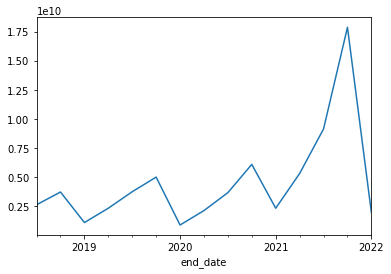

In [45]:
cw_nd.NETPROFIT.plot()

In [46]:
56*(1/(1+0.2)**10)

9.044312641831365

# 自由现金流估值法 DCF

参考链接：

DCF方法的理解：

https://zhuanlan.zhihu.com/p/358808637

https://zhuanlan.zhihu.com/p/370721850

https://xueqiu.com/1457764636/164180774?ivk_sa=1024320u

DCF的python实现：

https://blog.csdn.net/wuditong321/article/details/121158754

https://github.com/xuelixunhua/stock_DCF


* 现金流贴现估值法

自由现金流贴现估值法是最为广泛认同和接受的主流价值估值法。这一模型在资本市场发达的国家中被广泛应用于投资分析和投资组合管理、公司并购和公司财务等领域。

* 现金流贴现估值法的基本原理

任何资产的价值等于其预期未来全部现金流的现值总和，这是现金流贴现估值方法的估值原理。即通过选取适当的贴现率，折算出预期在公司生命周期内可能产生全部的现金流之和，从而得出公司的价值.现金流会因所估资产的不同而有差异.对股票来说,现金流是红利；对债券而言，现金流是利息和本金；对实际项目而言，现金流是税后净现金流。贴现率取决于所预测现金流的风险程度，资产风险越高，贴现率就越高；反之,资产风险越低，贴现率越低。

有以下四种模型：

1. 零增长模型
2. 不变增长模型
3. 两阶段模型
4. 三阶段模型

不同的是自由现金流的使用和贴现的方式不同。

**计算步骤**：

1. 计算自由现金流并依据相应的方法折现($\star\star\star\star\star$, the most important, this is what the code solves)
2. 计算股权价值= 1.+金融资产+长期股权投资-公司债务
3. 计算少数股东比例
4. 归属于上市公司股东的价值=股权价值$\times$(1-少数股东比例)
5. 每股内在价值=归属于上市公司股东的价值/股本

其中，

- 经营资产自由现金流=公司维持原有生产经营规模前提下的增量现金流入=经营活动现金流量净额-保全性资本支出=经营活动现金流量净额-固定资产折旧-无形资产和长期待摊费用摊销-处置长期资产的损失
- $WACC=k_d\times\frac{D}{D+E}\times(1-t)+k_e\times\frac{E}{D+E}$。其中债务资本成本率=债务资本总额/债务资本平均金额$\times$100%=(财务费用+汇兑收益)/(期初债务资本+期末债务资本)/2；股权资本成本率应该高于同期的国债利率，加上股票投资的风险溢价，我们普遍设置为8%；t为公司实际所得税税率=1-净利润/税前利润。
- 公司债务=有息债务
- 少数股东比例=$\frac{少数股东权益}{股东权益合计}$
- 股本=市值/股价


$$
\begin{aligned}
&零增长模型：V=\frac{FCF}{WACC}\\
&不变增长模型：V=\frac{FCF(1+g)}{WACC-g}\\
&两阶段模型：V=\sum_{t=1}^n\frac{{FCF}_t}{(1+WACC)^t}+\frac{TV}{(1+WACC)^n}，\ \  其中TV=\frac{FCF_n(1+g_2)}{WACC-g_2}\\
&三阶段模型：V=\sum_{t=1}^n\frac{{FCF}_0(1+g_1)}{(1+WACC)^t}+\sum_{t=n+1}^m\frac{{FCF}_n(1+g_2)}{(1+WACC)^t}+\frac{FCF_{n+m}(1+g_3)}{(WACC-g_3)(1+WACC)^{n+m}}\\
\end{aligned}
$$

零增长模型适用于成熟稳定、没有增长的公司，每年的自由现金流也保持在一个稳定的金额水平，类似于永续年金；如果该类公司的自由现金流全部用于发放股利现金，那么其得出的结果与股利贴现模型非常接近。

不变增长模型适用于成熟的公司，未来的自由现金流以非常缓慢的速度增长。

在两阶段模型中，投资者的预期回报WACC至少要高于总体的经济增长率；不变增长率g2通常小于WACC，反之，意味着很长时间以后公司的规模将超过总体经济规模。

在三阶段模型中，假设所有的公司经历三个阶段：成长阶段、过渡阶段和稳定阶段。三个阶段的成长率由高到低，稳定阶段保持较低增长率的不变增长。


### classwork 1.2

* 参考上述例子，实现基于掘金平台，股票sz000977最近一期的DCF计算。

### classwork1.3

* 参考https://zhuanlan.zhihu.com/p/358808637  计算茅台的估值

表名: deriv_finance_indicator

FCFF	企业自由现金流量	元	利润总额＋利息支出＋固定资产折旧＋无形资产摊销＋长期待摊费用摊销 － 所得税 － 资本性支出 － 营运资本净增加

In [ ]:
cw_mt=get_fundamentals_n(table='deriv_finance_indicator', symbols="SHSE.600519", end_date="2022-05-01", count=50,
                            fields='FCFF',df=True)
cw_mt

In [ ]:
cw_mt

我们简单的用两阶段增长模型来计算一下A股股王贵州茅台的估值，茅台最新发布的20年扣非净利润是455亿，我们直接用这个数字作为D0，第一个阶段为10年，增长率为g1=15% ，第二个阶段即第11年开始的永续增长率为8%，我们期望的年化收益率为r=12%，则可以通过上述方法计算出茅台当前市值为20,835亿元，对应的股价大概为1662元。

In [73]:
t=0
for i in range(1,11):
    t=t+455*(1+0.15)**i/(1+0.12)**i
    print(455*(1+0.15)**i/(1+0.12)**i)

467.18749999999994
479.70145089285705
492.55059689891556
505.7439164587079
519.2906285067089
533.2001989131385
547.4823470983117
562.1470528241593
577.2045631676634
592.6653996810828


In [75]:
(593*(1+0.08)/(0.12-0.08))/(1+0.12)**10

16011.000000000004

In [72]:
t+5146

10423.173654441545

现金流量表

表名: cashflow_statement
FINEXPE	财务费用	元

利润表

表名: income_statement
EXCHGGAIN	汇兑收益	元

衍生财务指标

表名: deriv_finance_indicator
ASSLIABRT	资产负债率	%	负债总额/资产总额＊100%